In [7]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from SimplePolicyNetwork import SimplePolicyNetwork
from SimpleRLPolicyGradientSolver import SimpleRLPolicyGradientSolver
from simpleBox import simpleBox
from SimRat import SimRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


VirtualRat0


simpleBox.py:222: RuntimeWarning: invalid value encountered in double_scalars
  right_accuracy = np.sum(history[right,-1]>0).astype(float) / np.sum(right)
simpleBox.py:228: RuntimeWarning: invalid value encountered in double_scalars
  p = left_accuracy / (left_accuracy + right_accuracy)


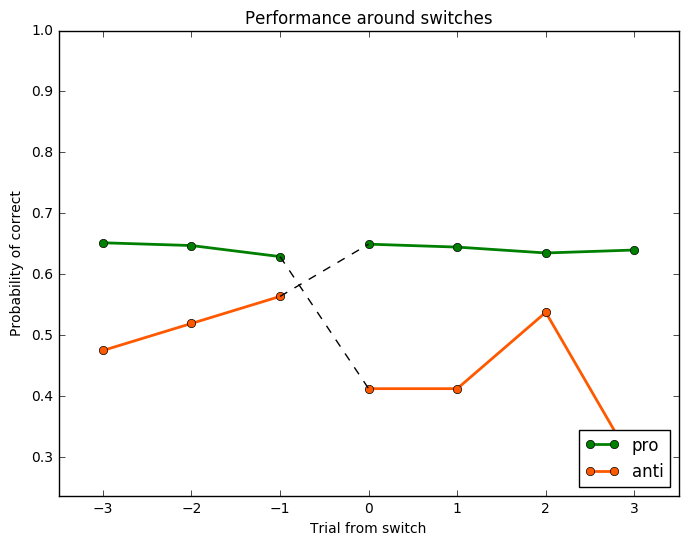

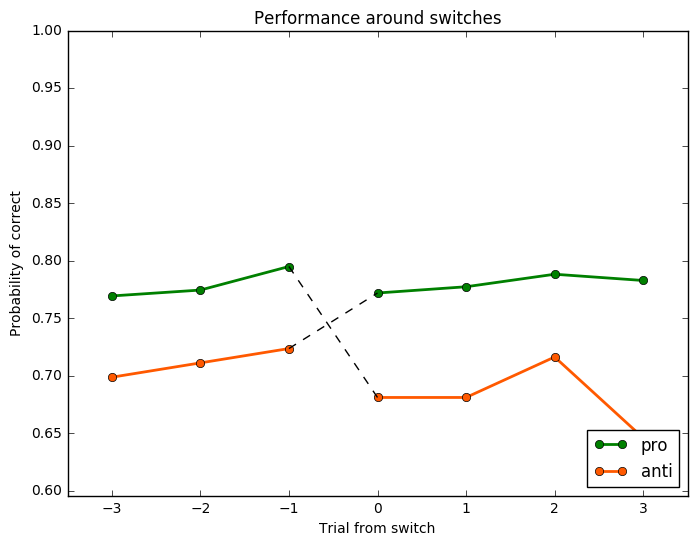

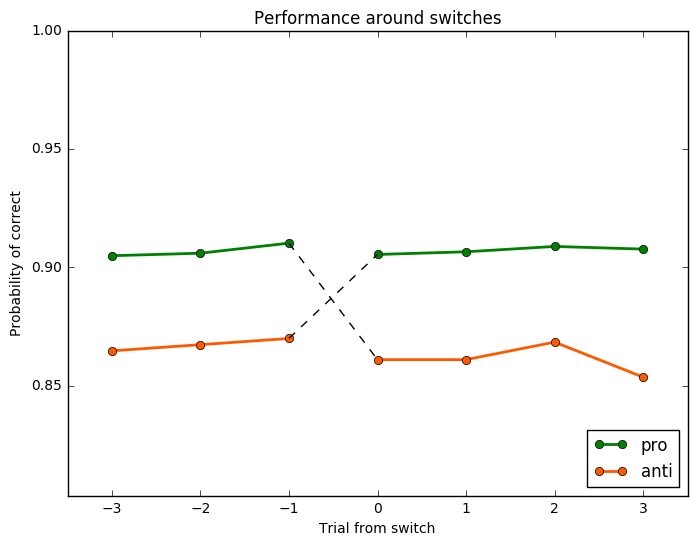

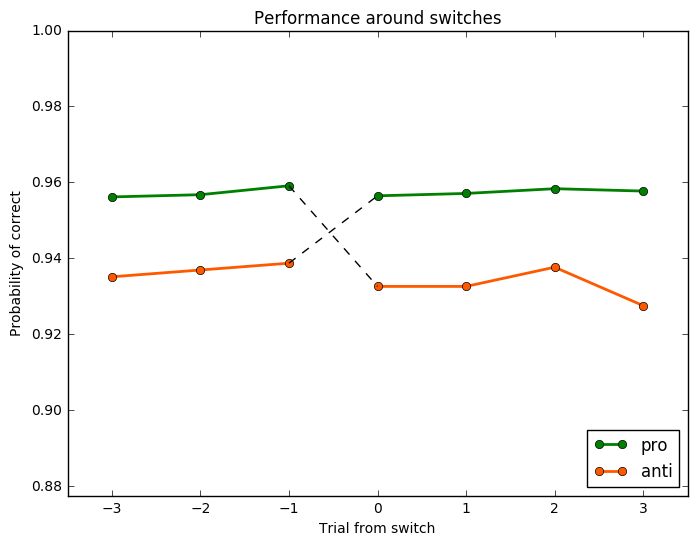

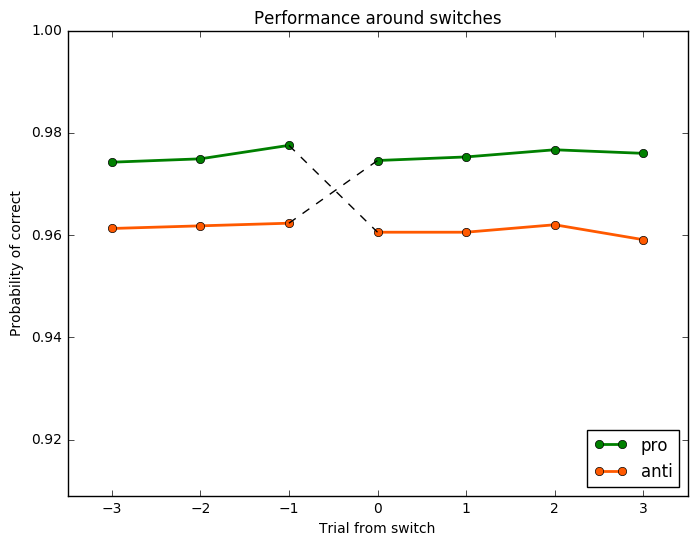

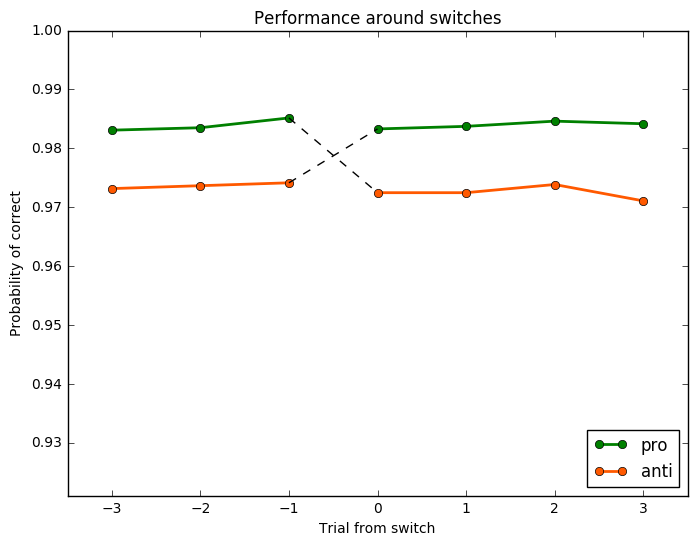

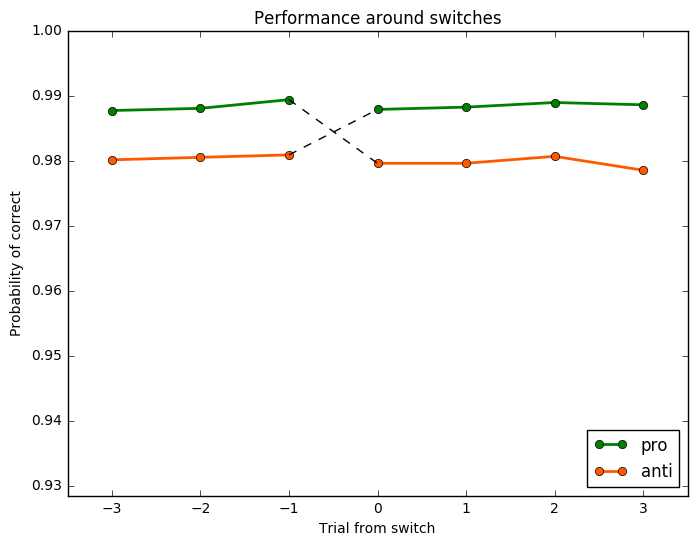

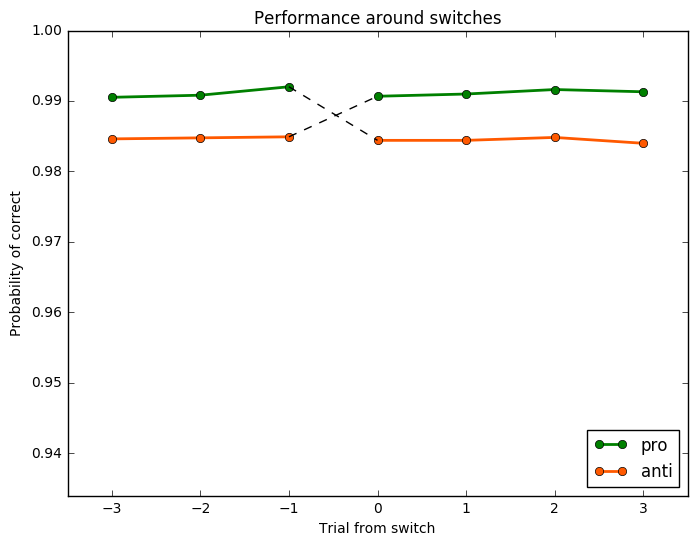

/usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


VirtualRat1


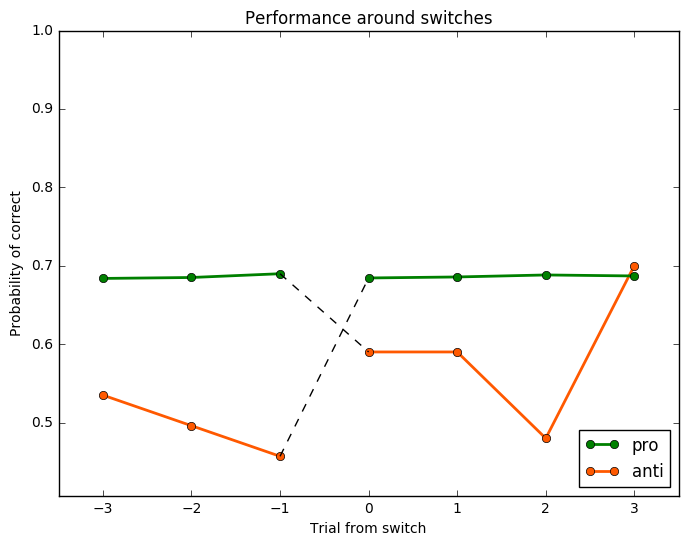

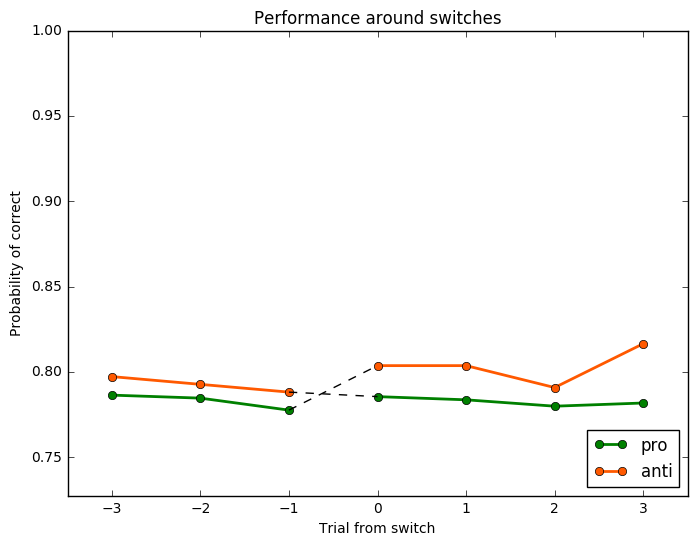

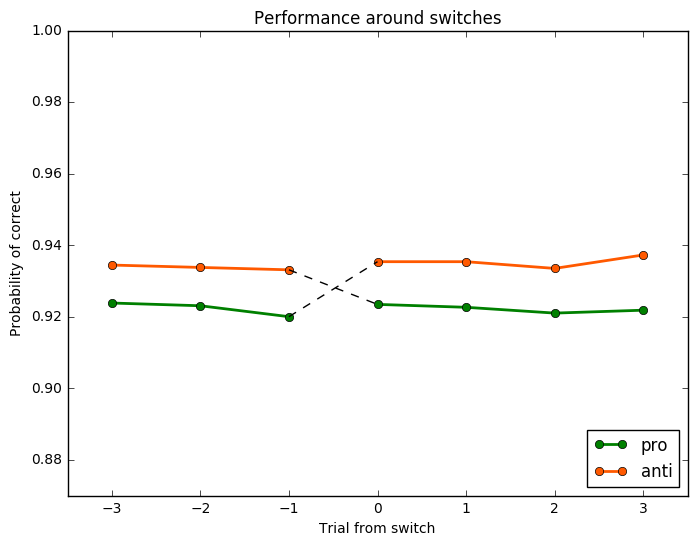

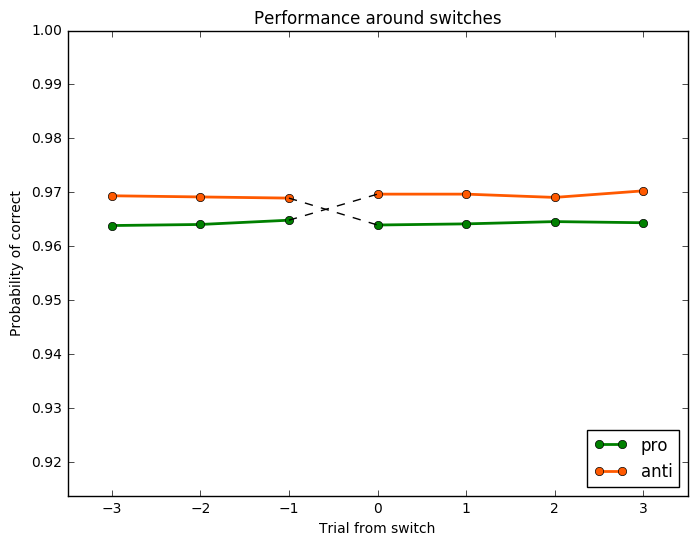

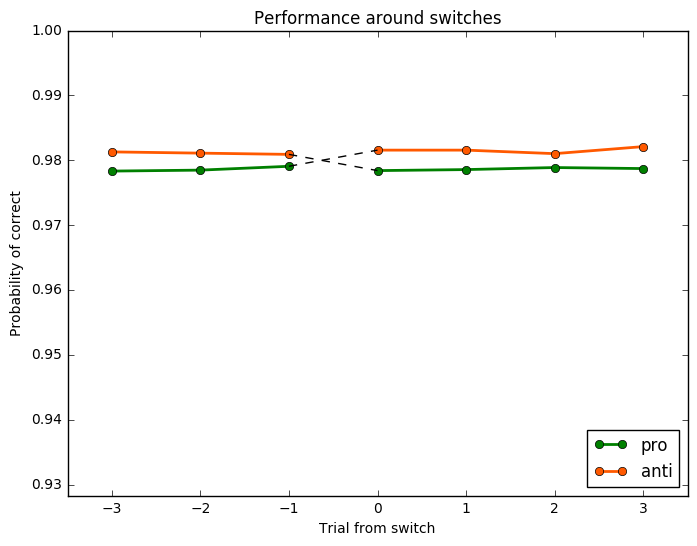

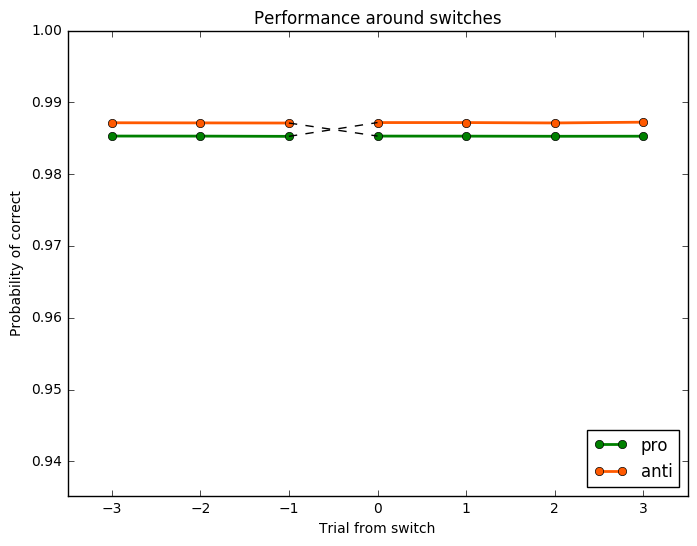

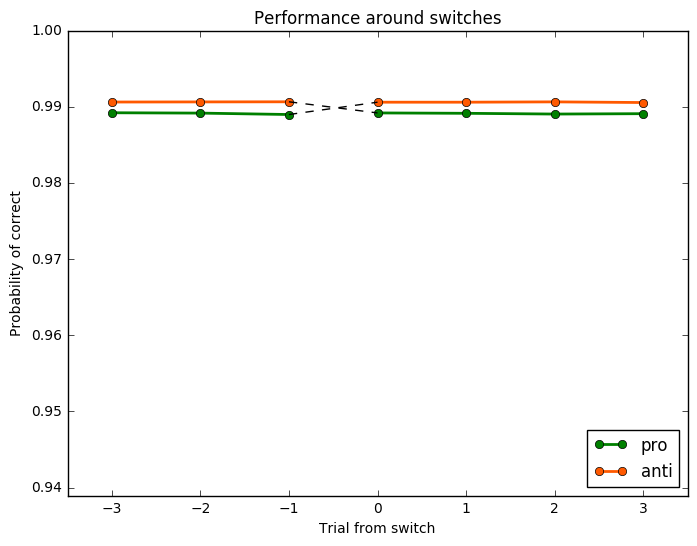

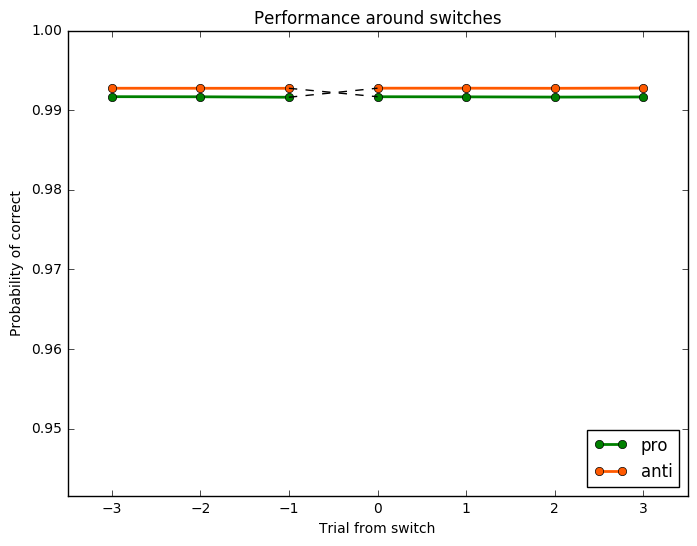

VirtualRat2


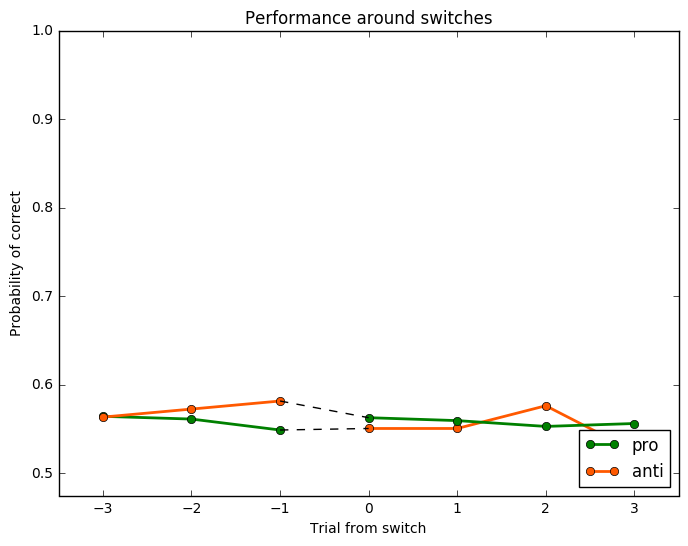

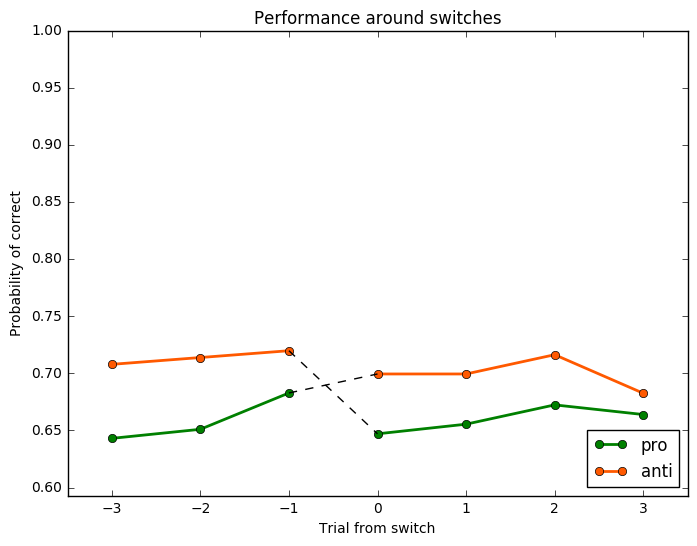

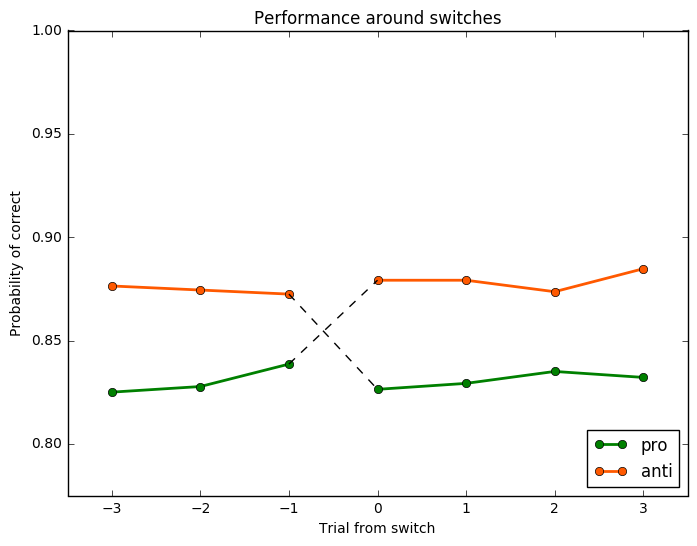

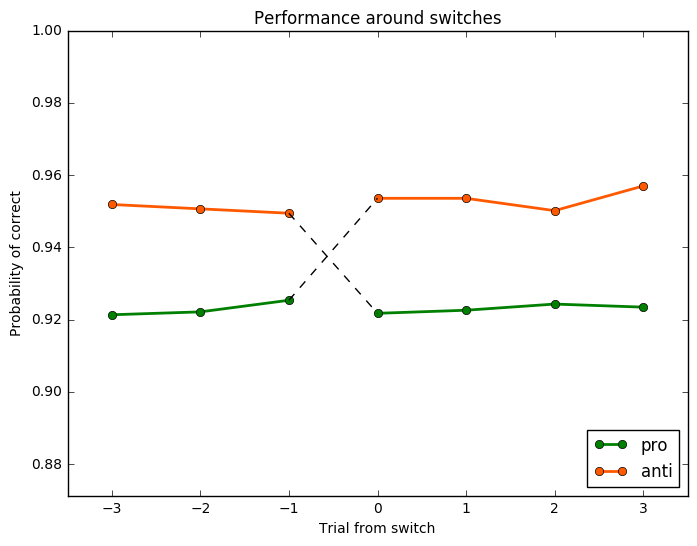

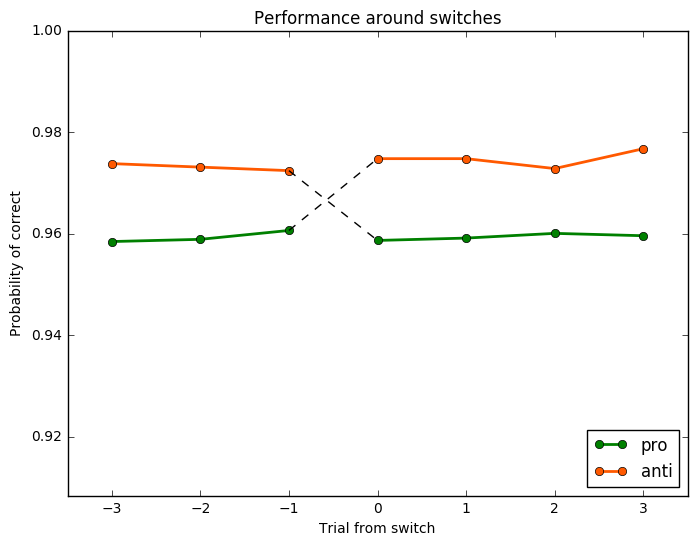

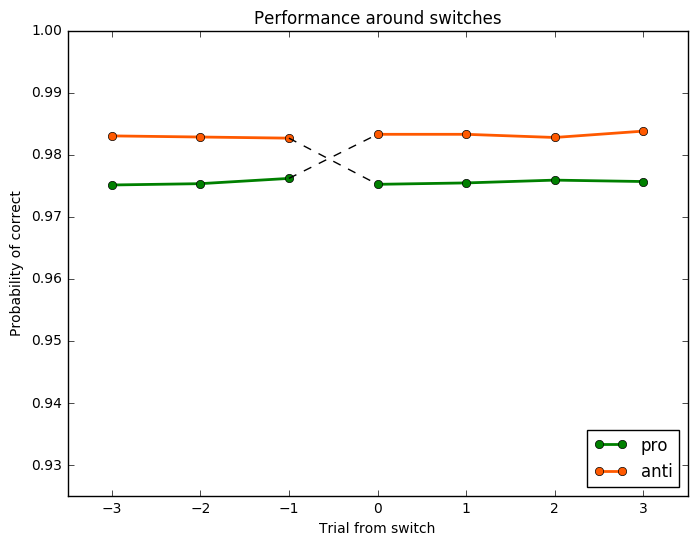

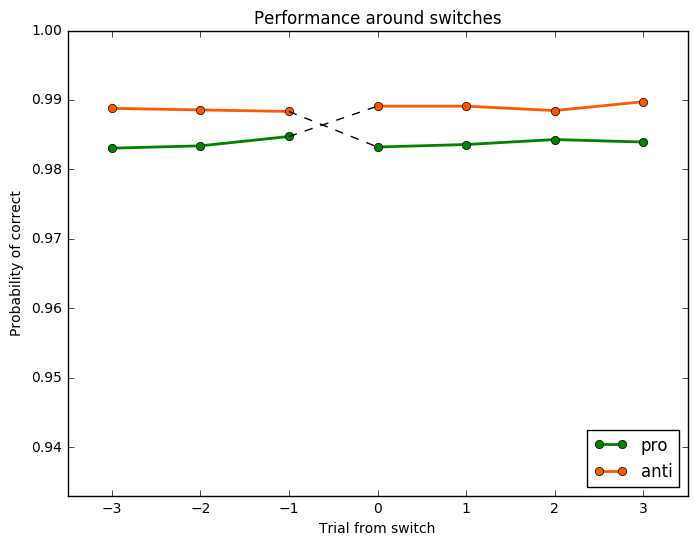

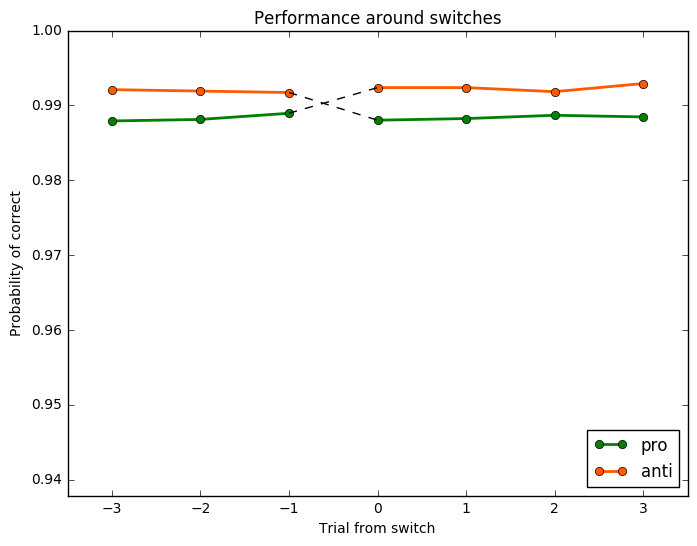

VirtualRat3


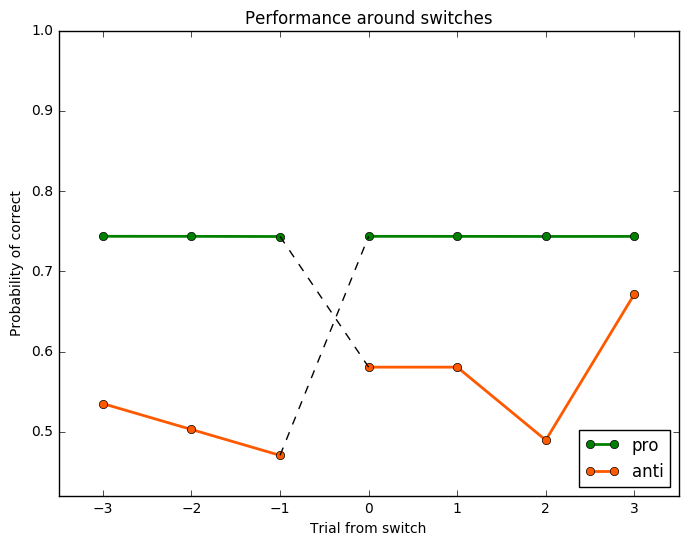

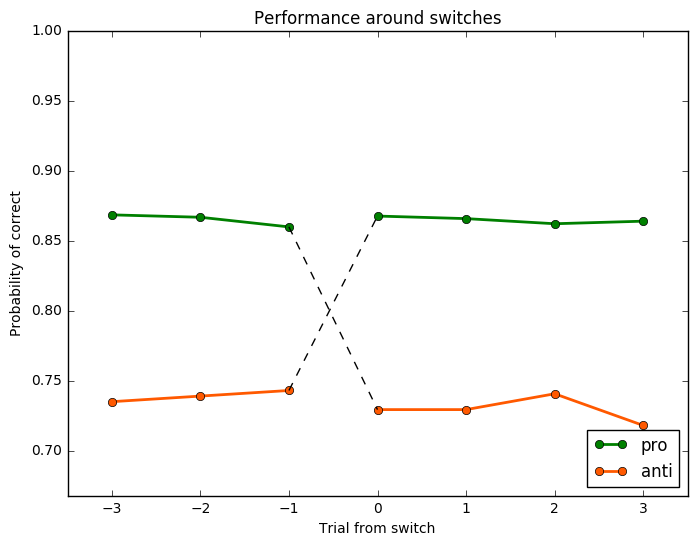

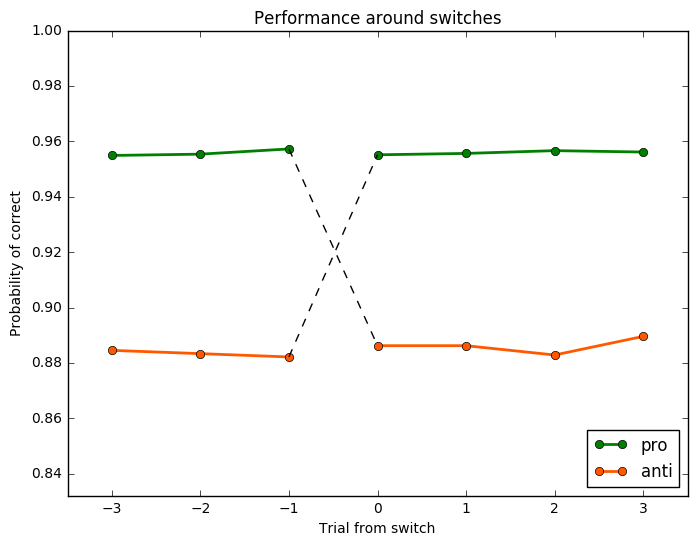

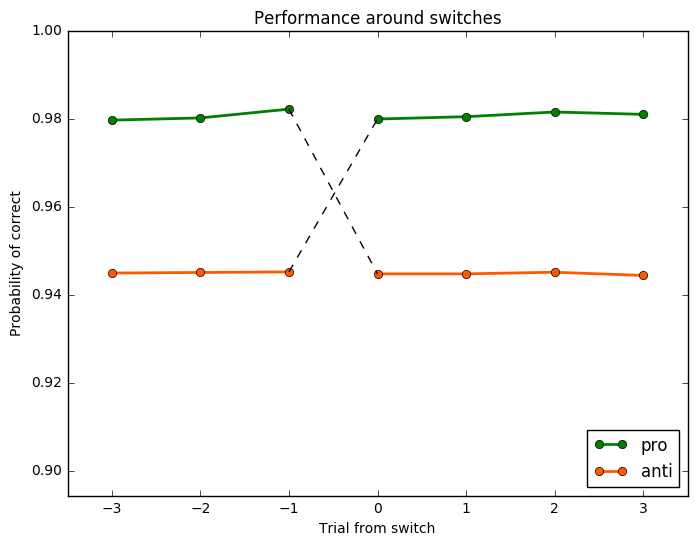

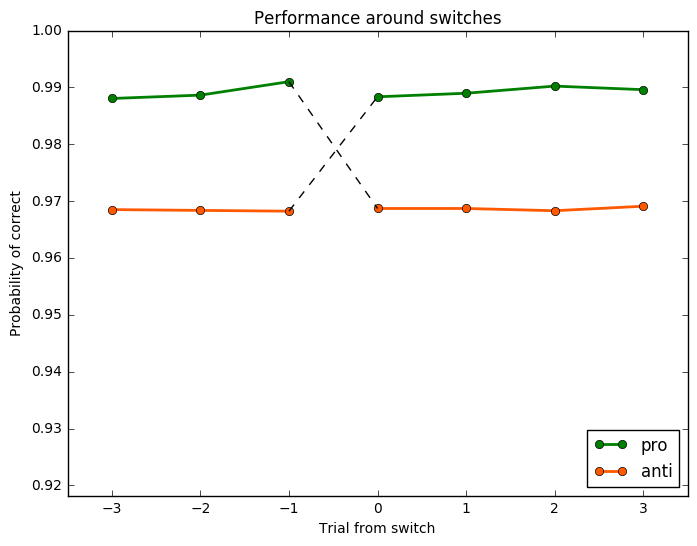

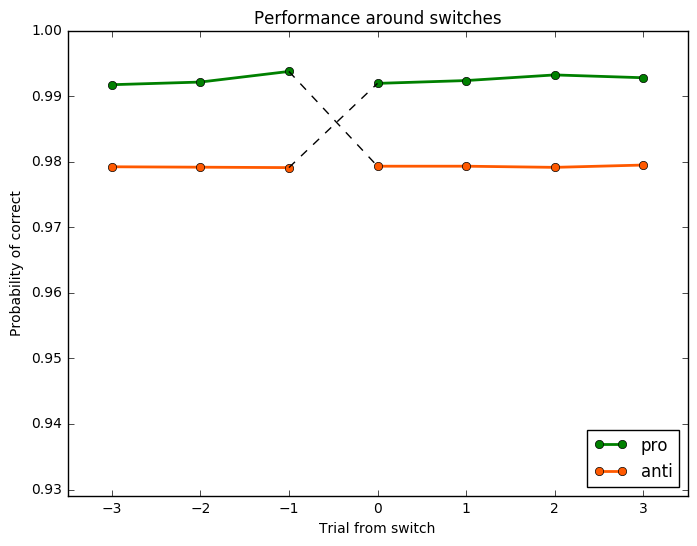

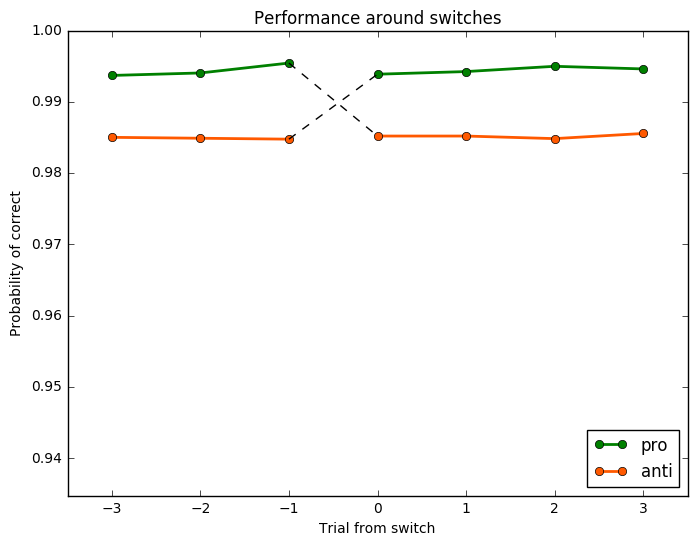

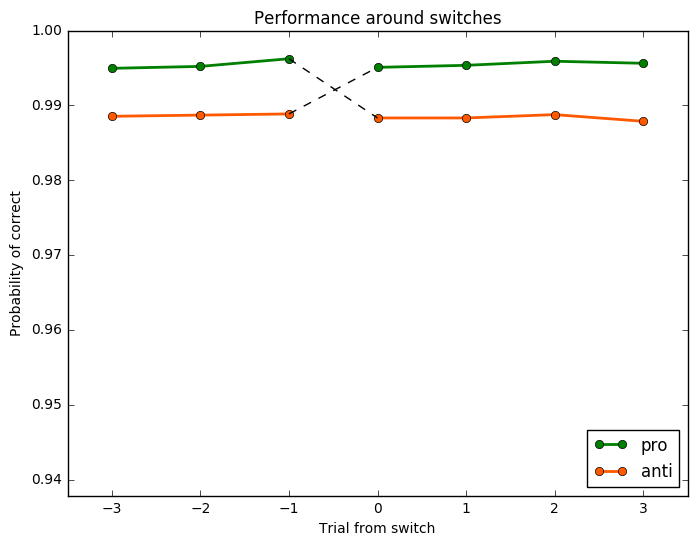

VirtualRat4


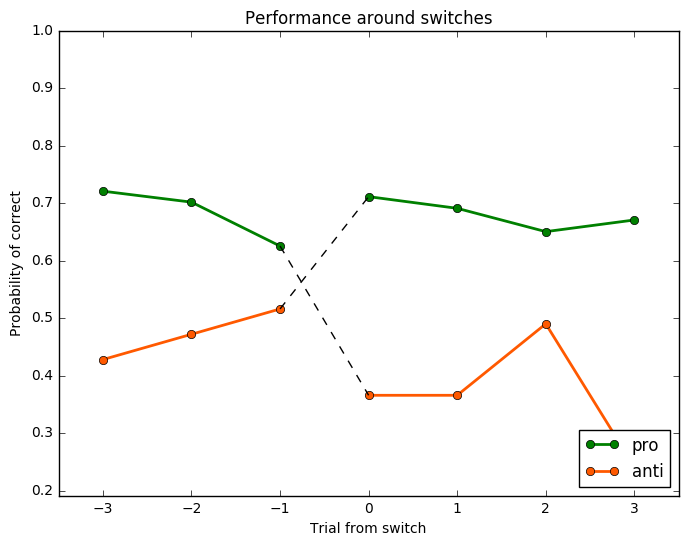

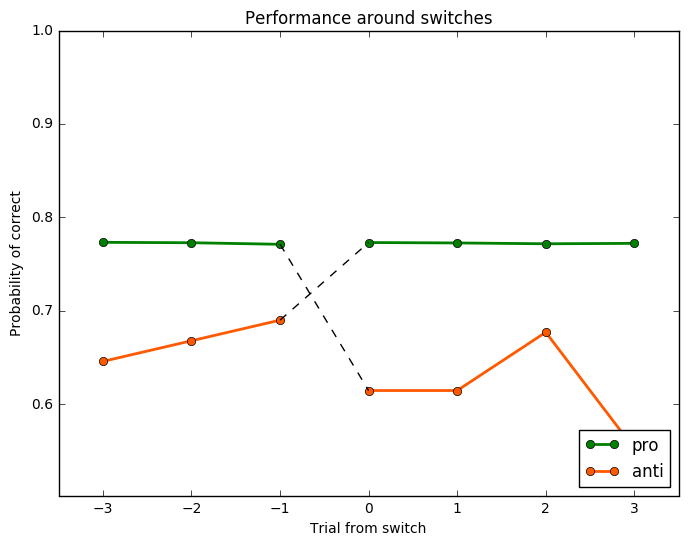

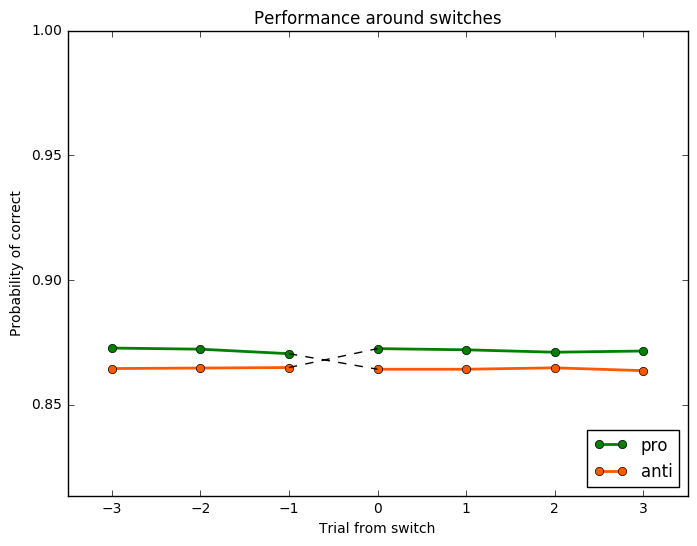

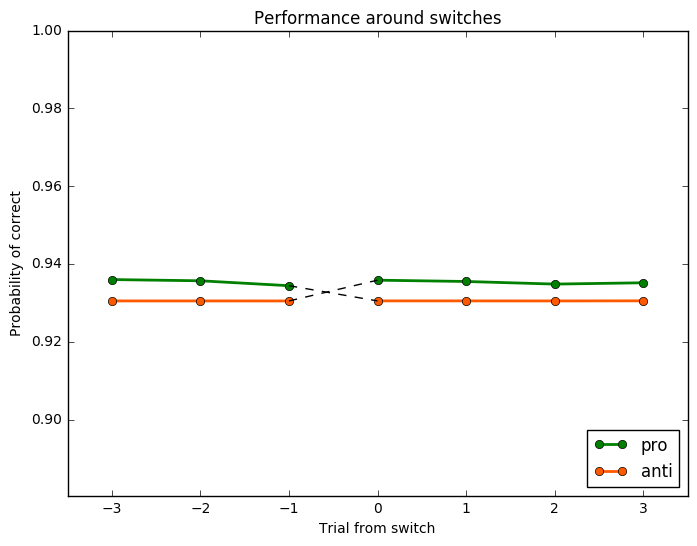

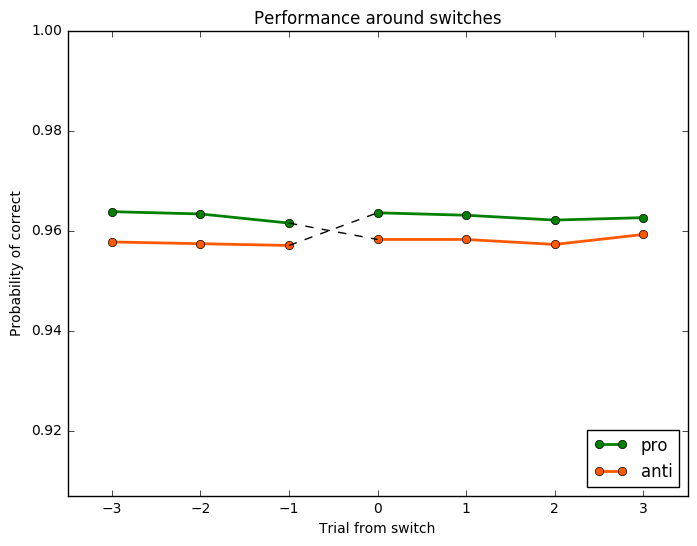

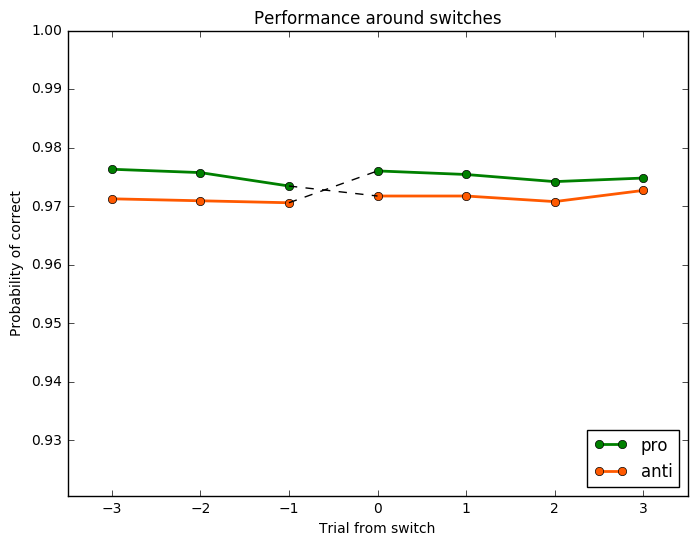

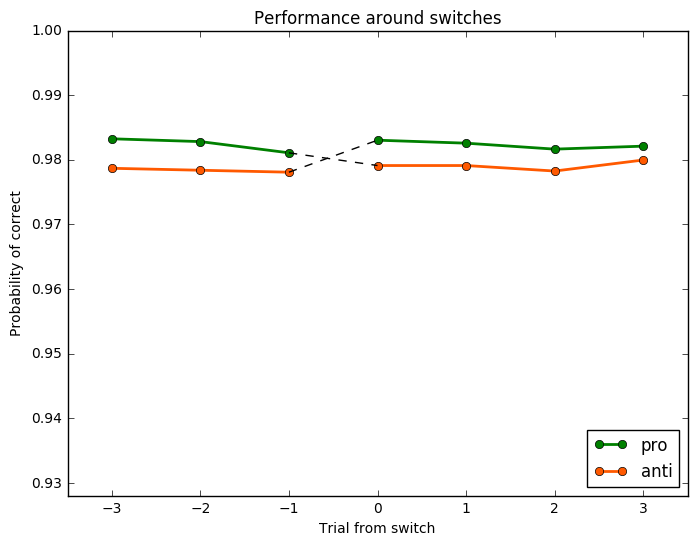

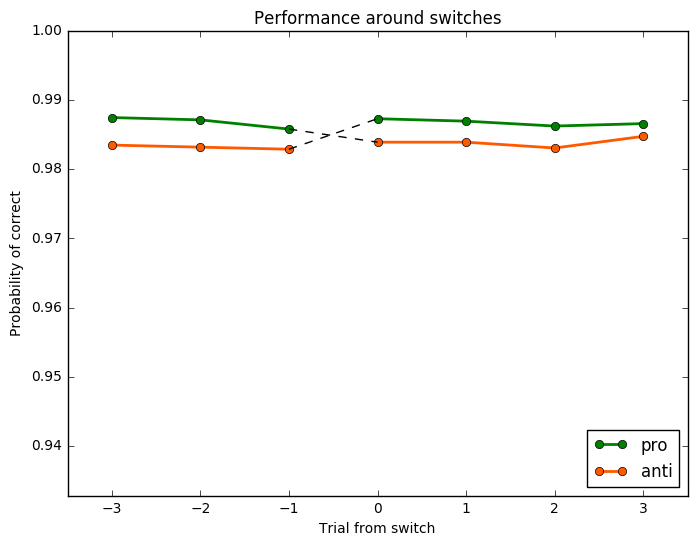

VirtualRat5


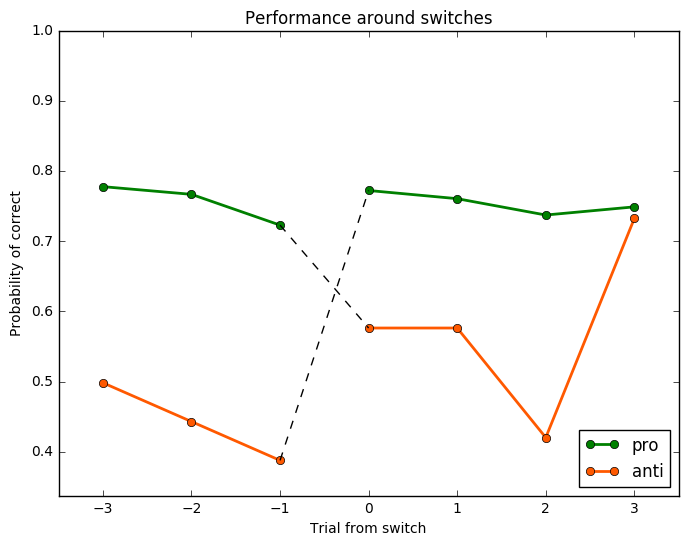

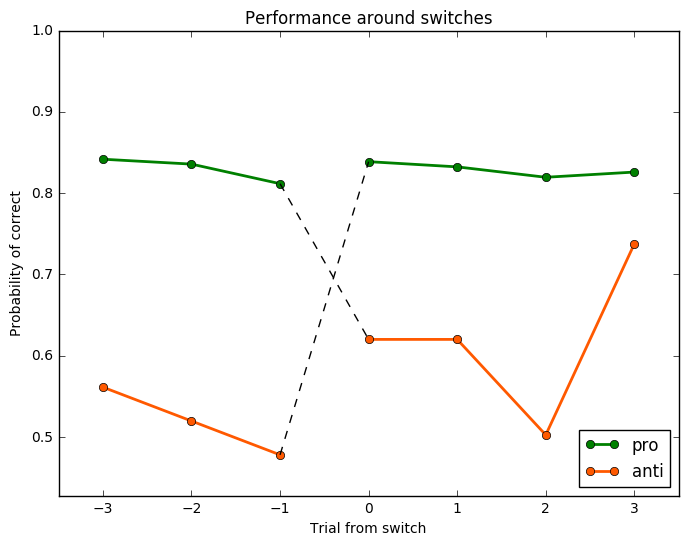

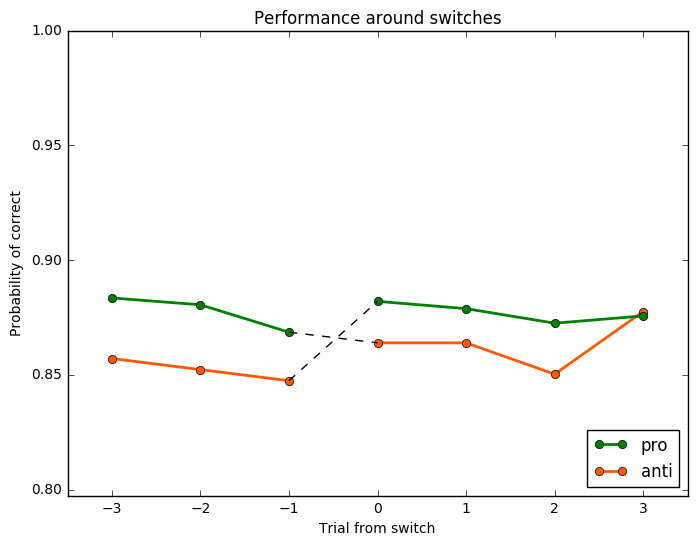

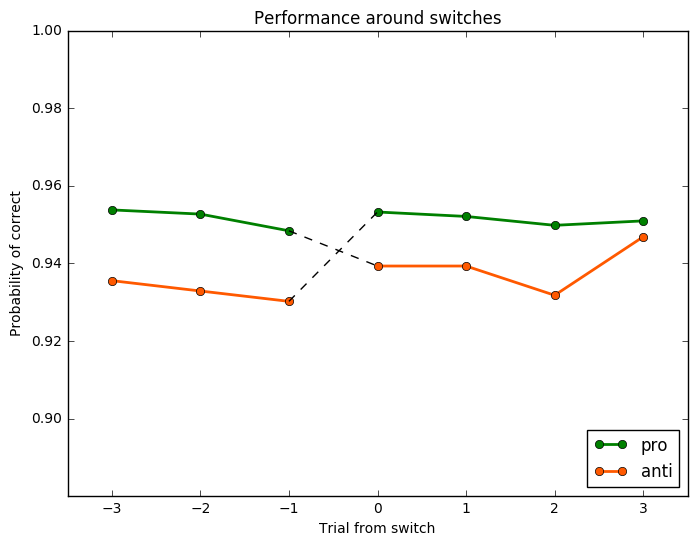

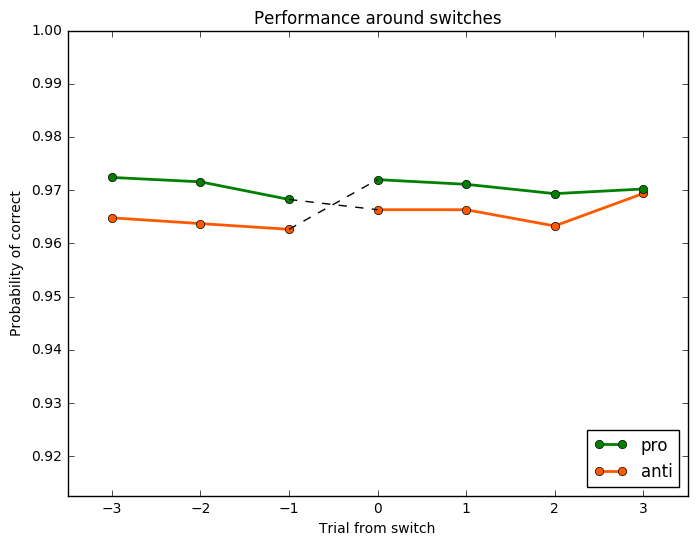

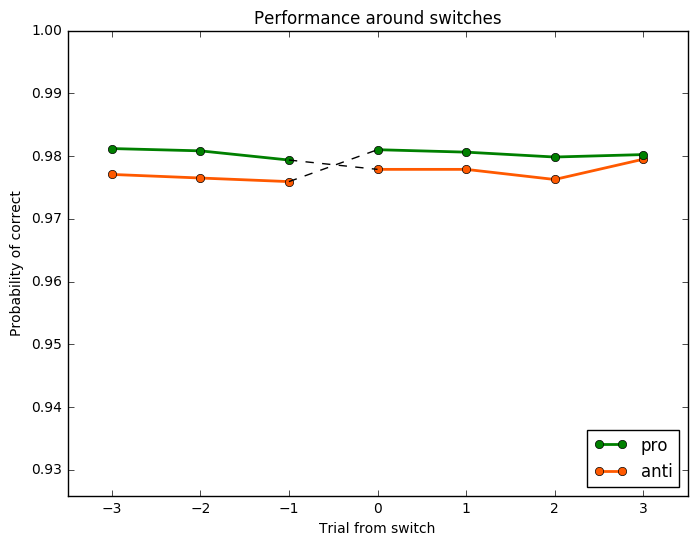

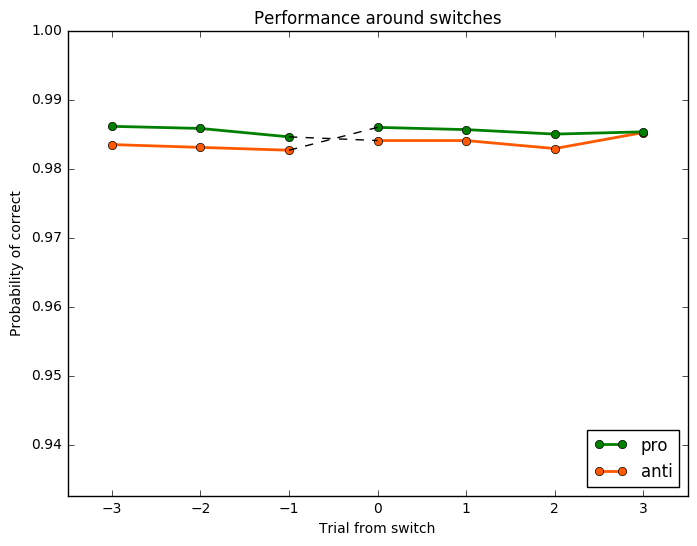

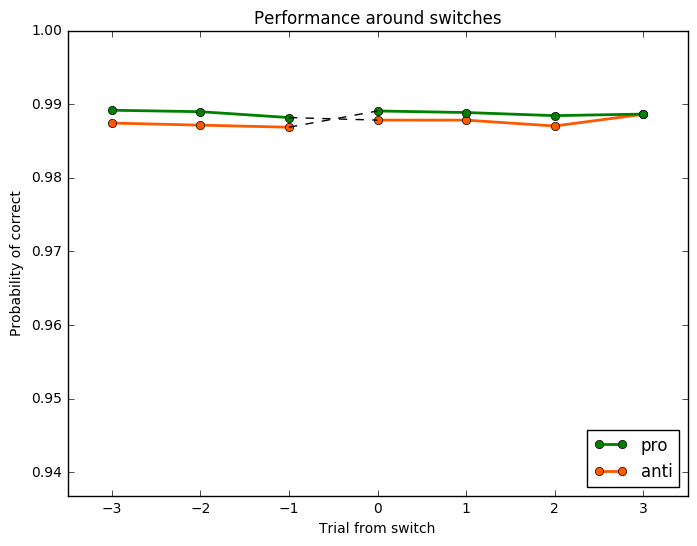

VirtualRat6


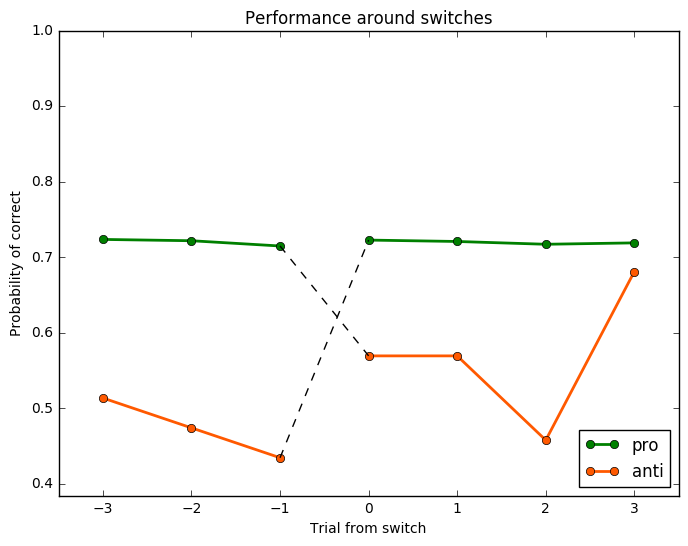

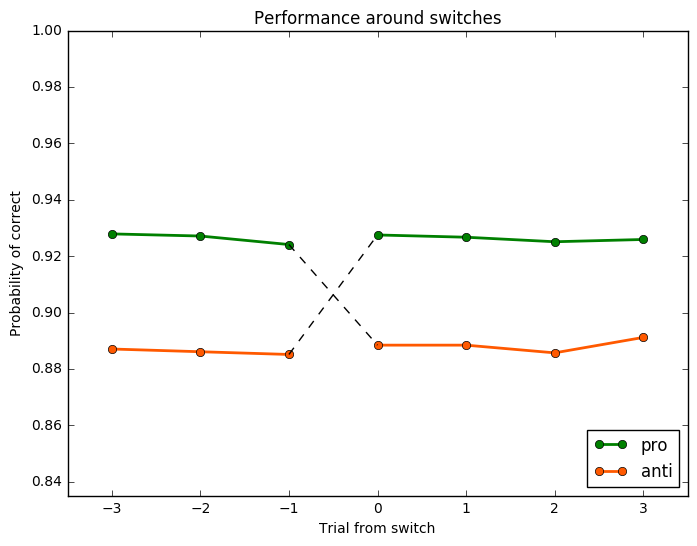

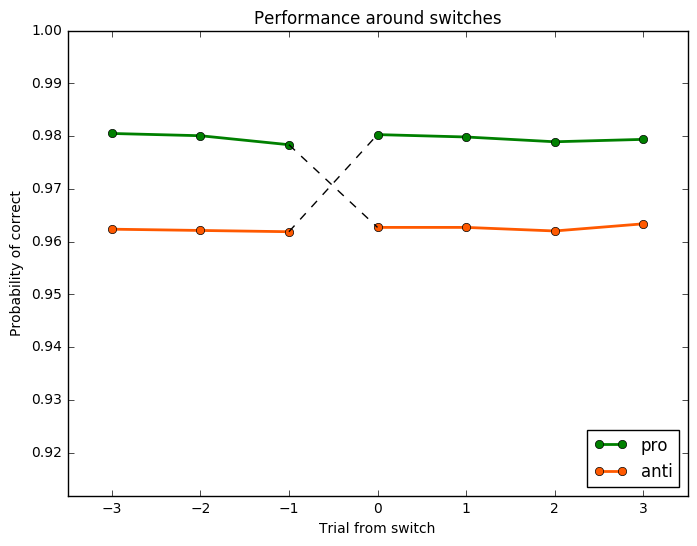

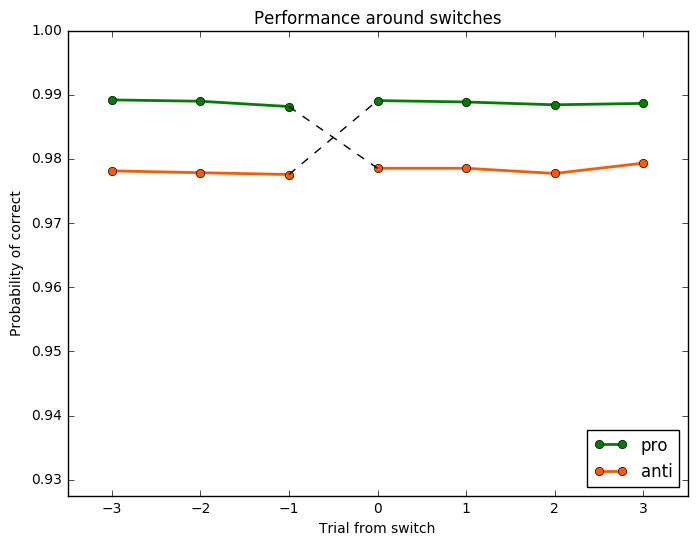

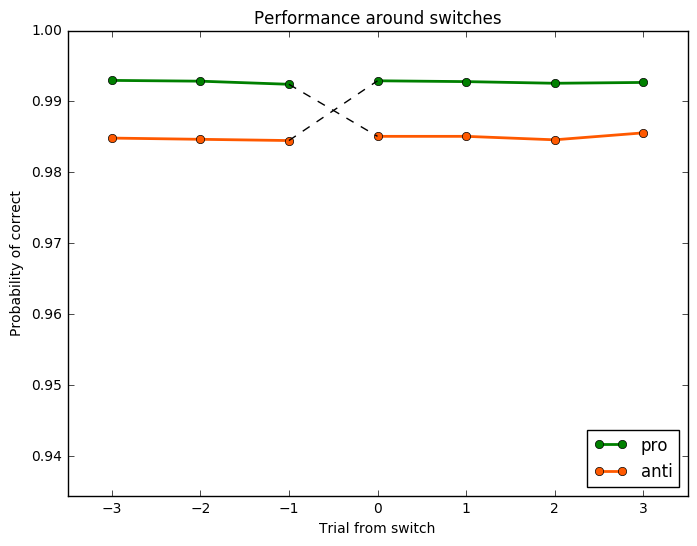

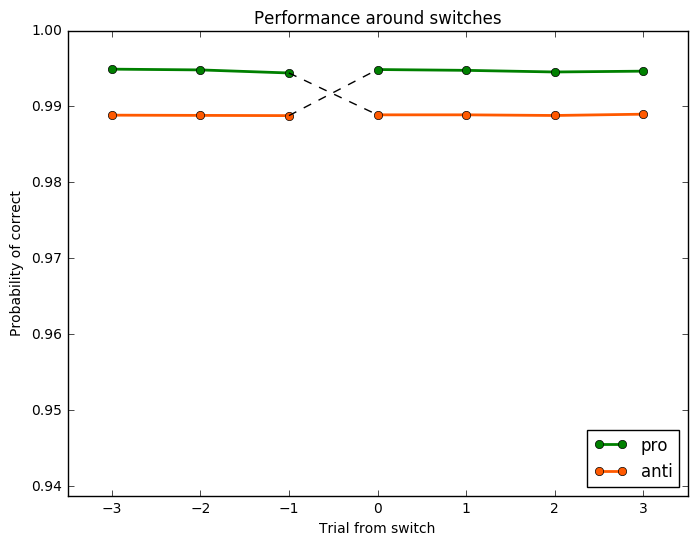

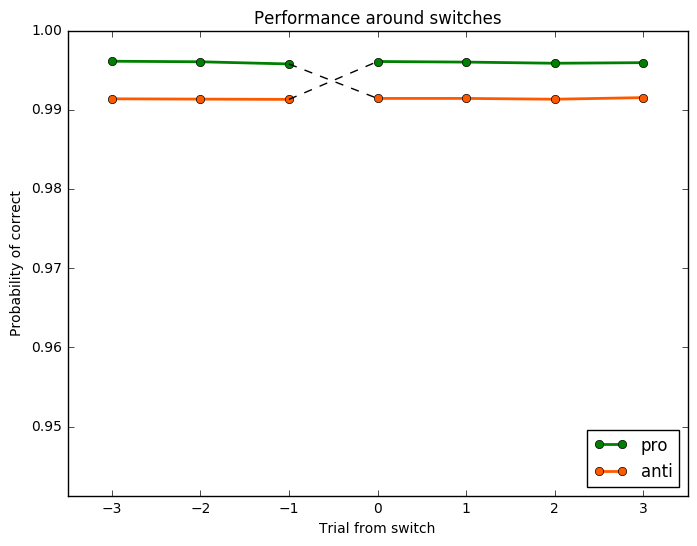

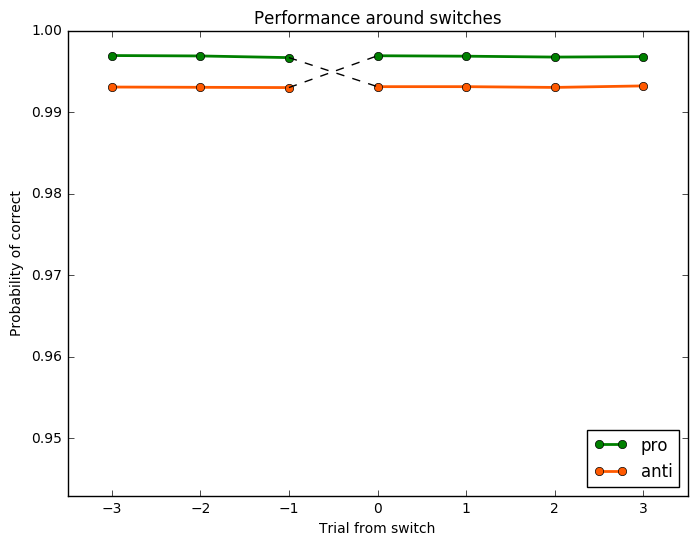

VirtualRat7


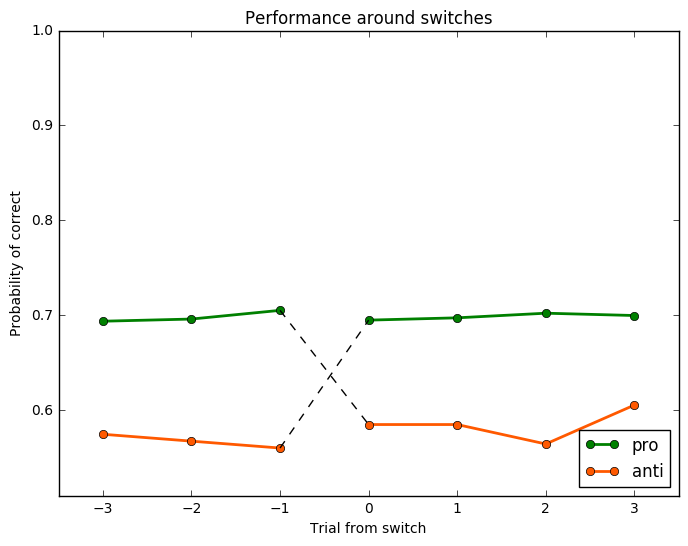

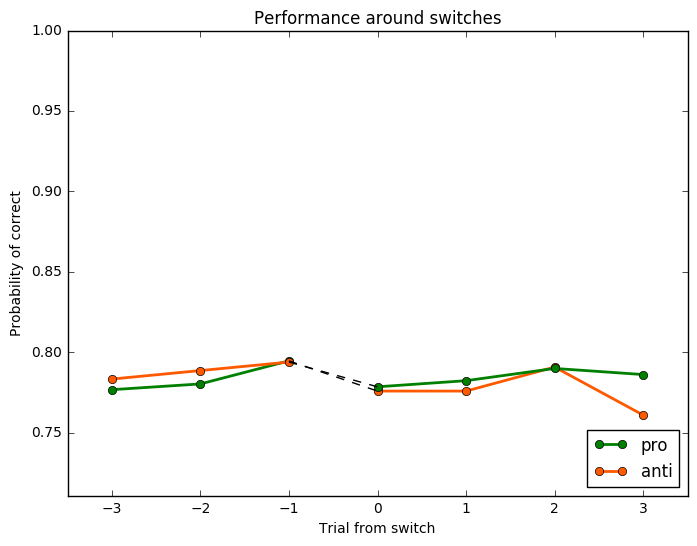

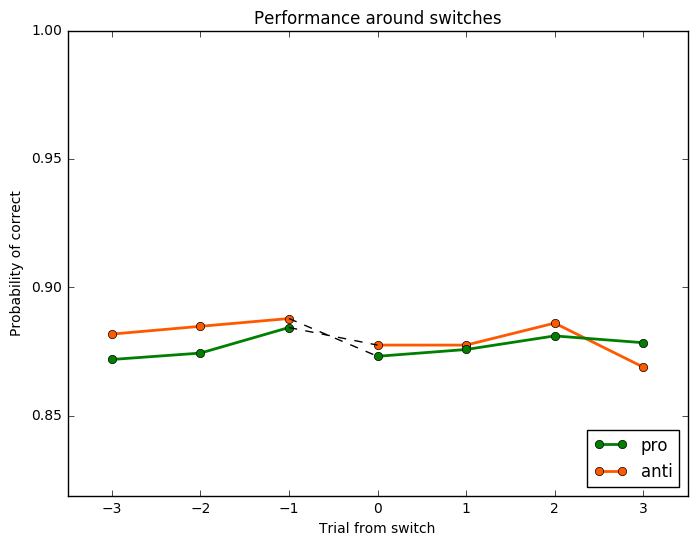

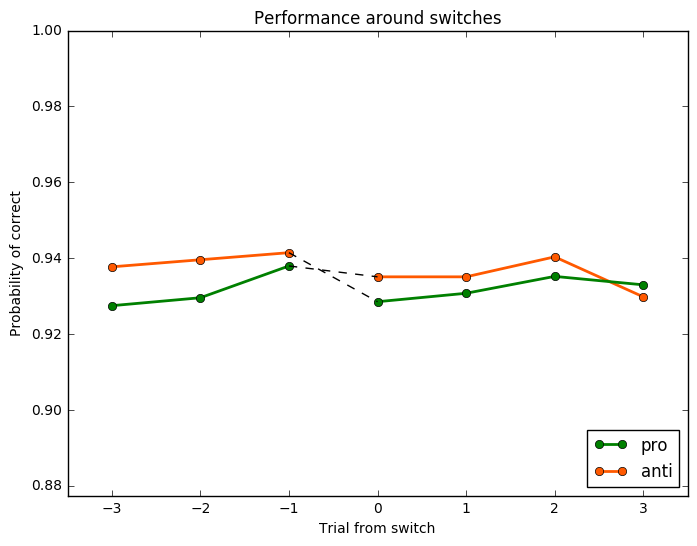

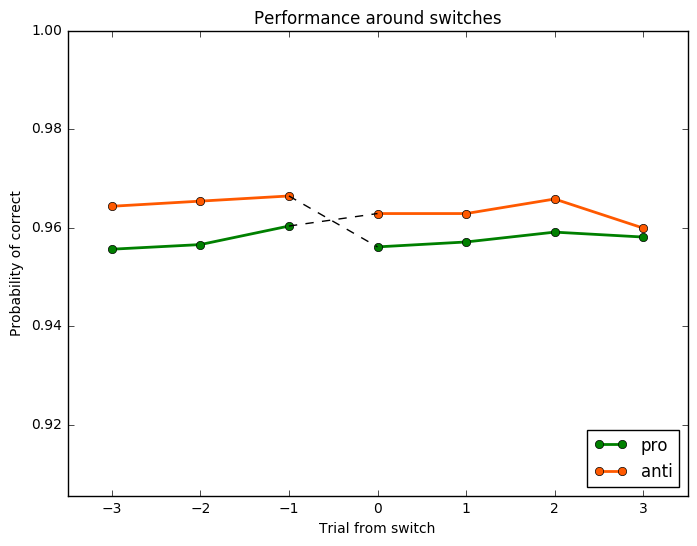

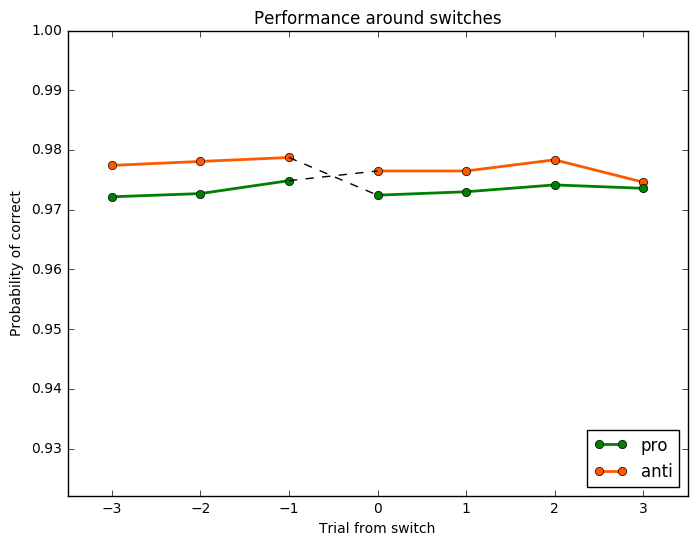

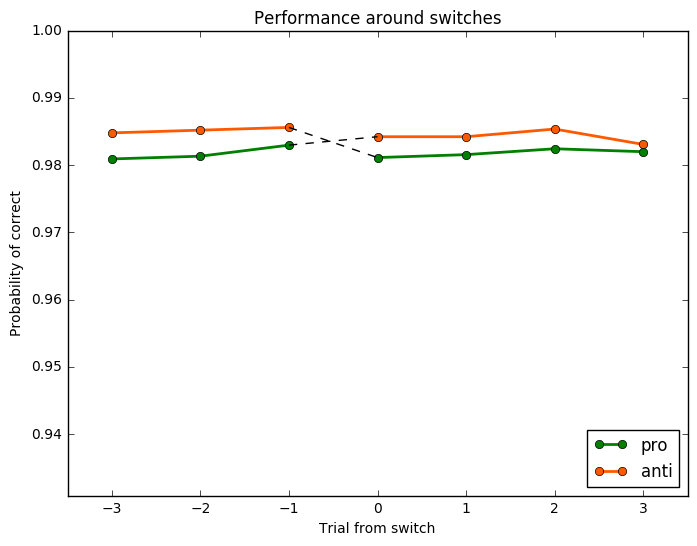

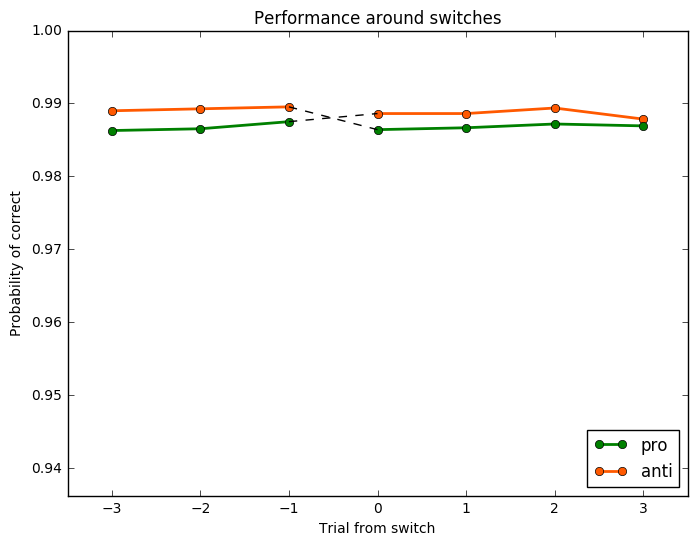

VirtualRat8


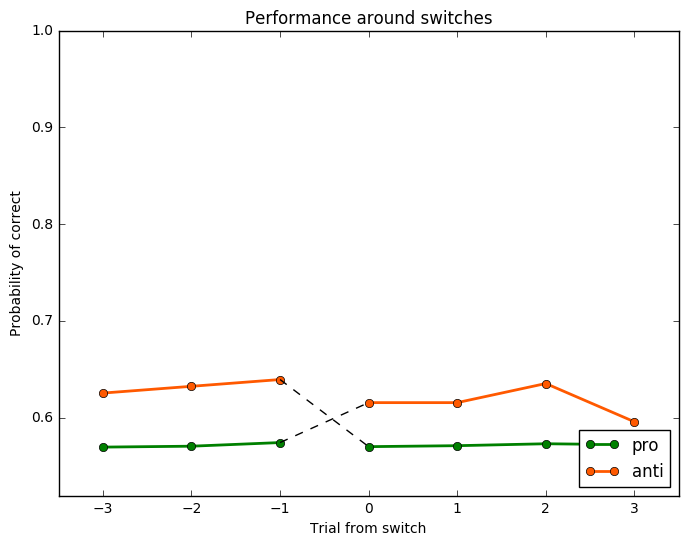

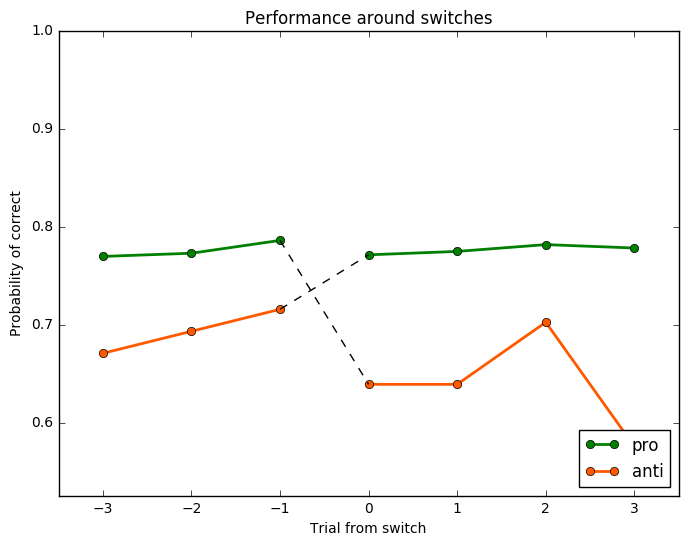

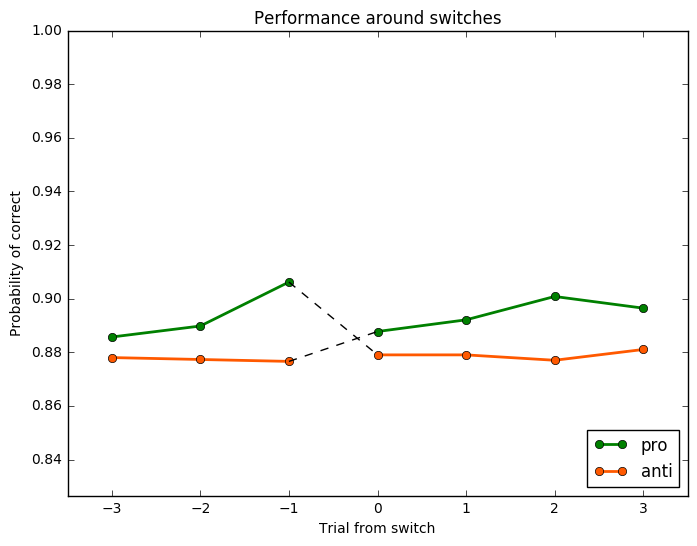

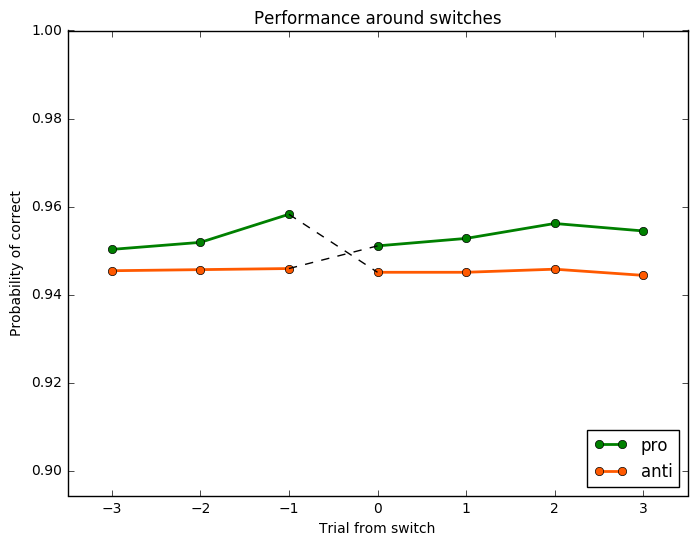

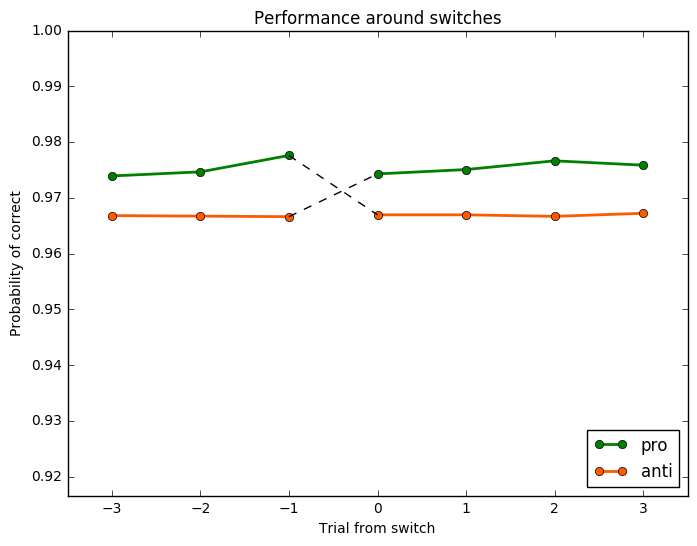

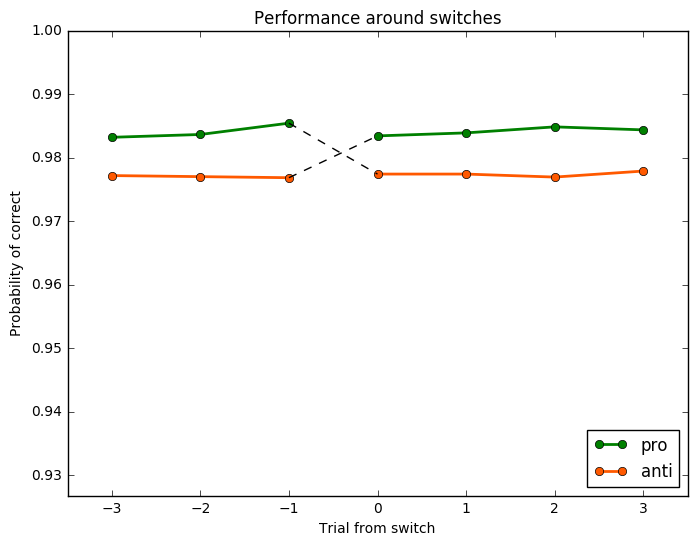

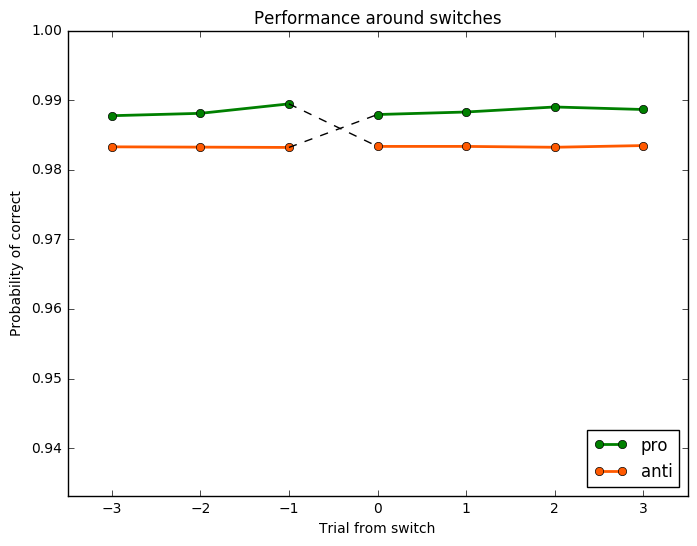

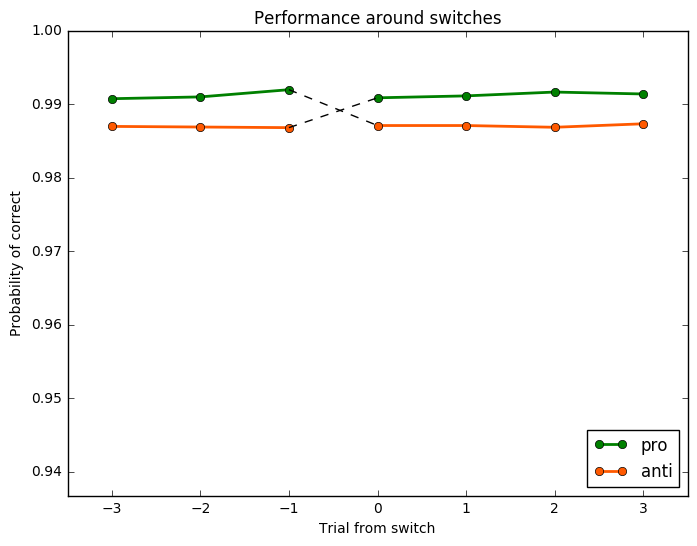

VirtualRat9


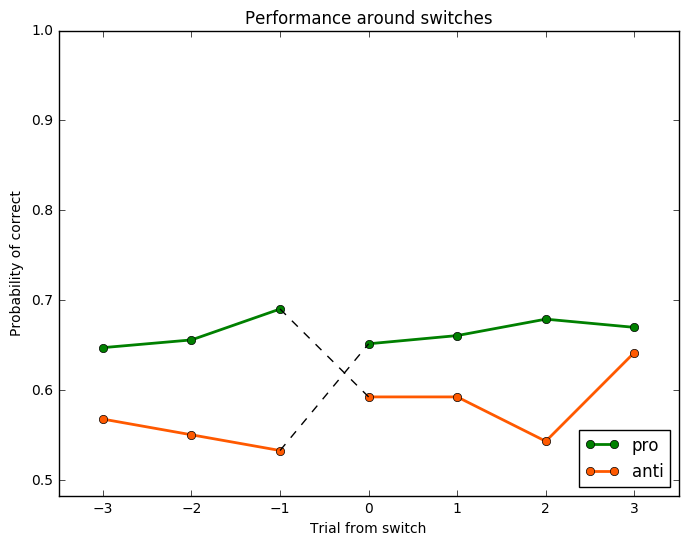

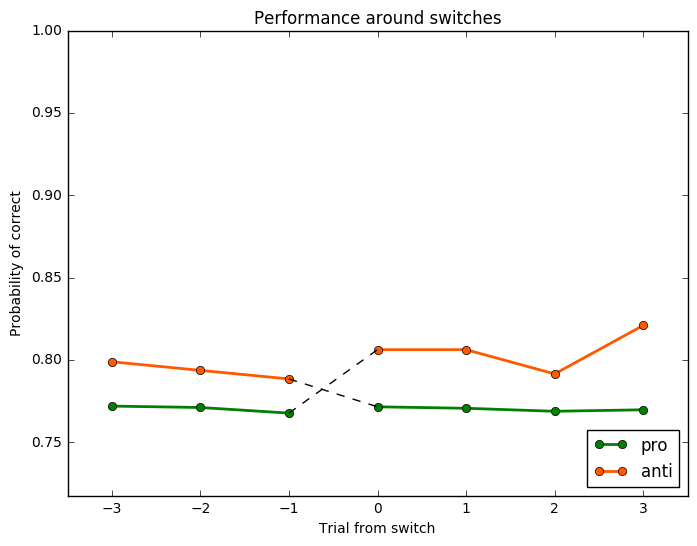

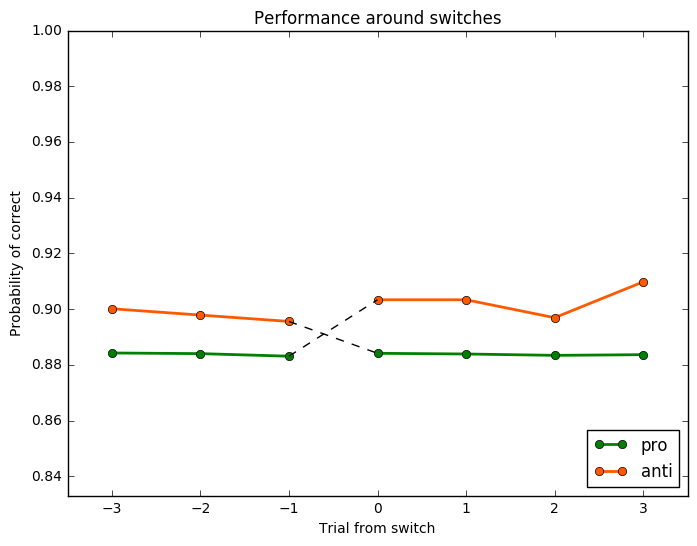

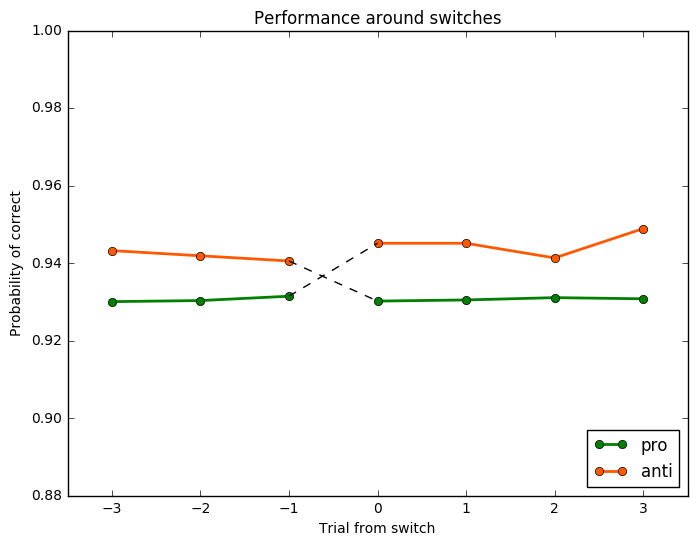

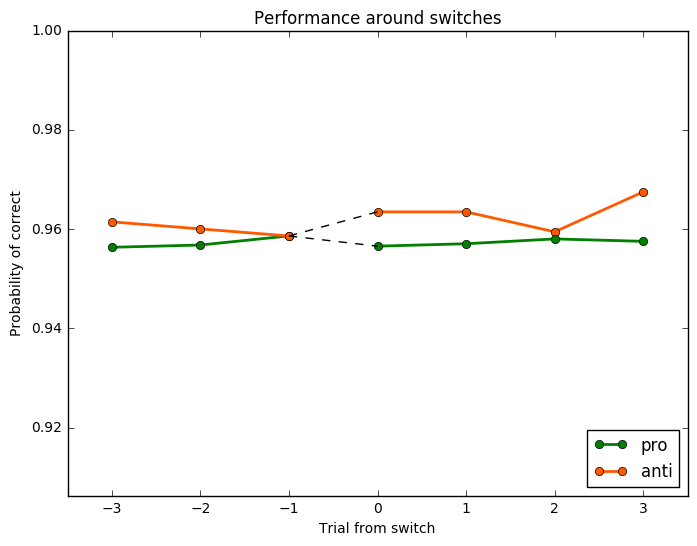

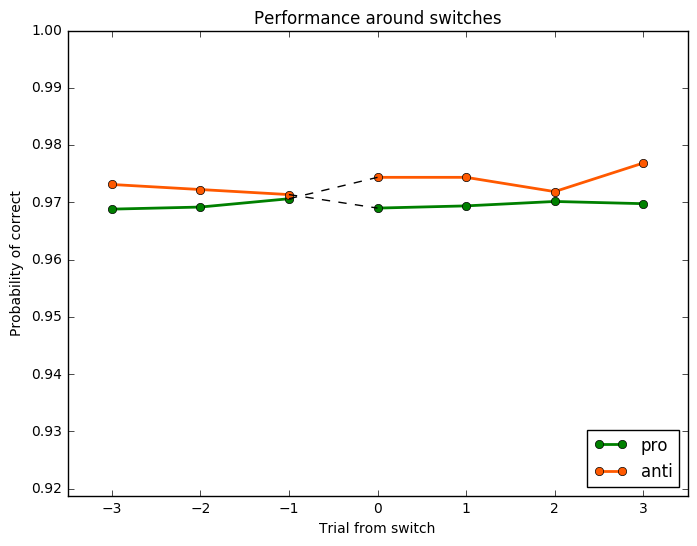

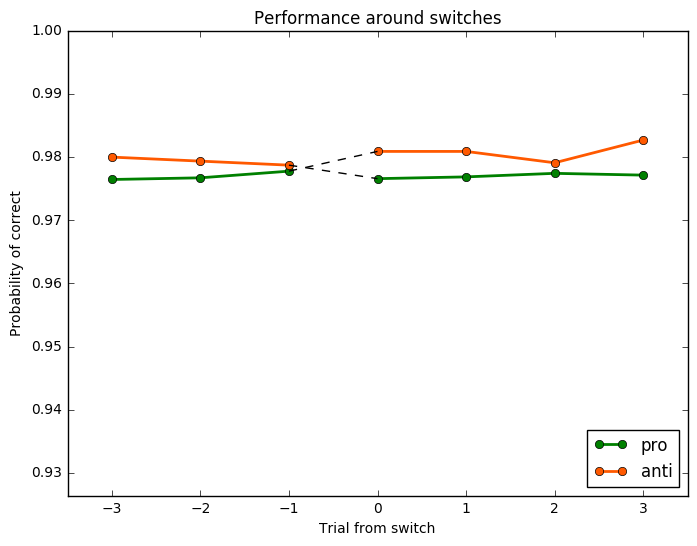

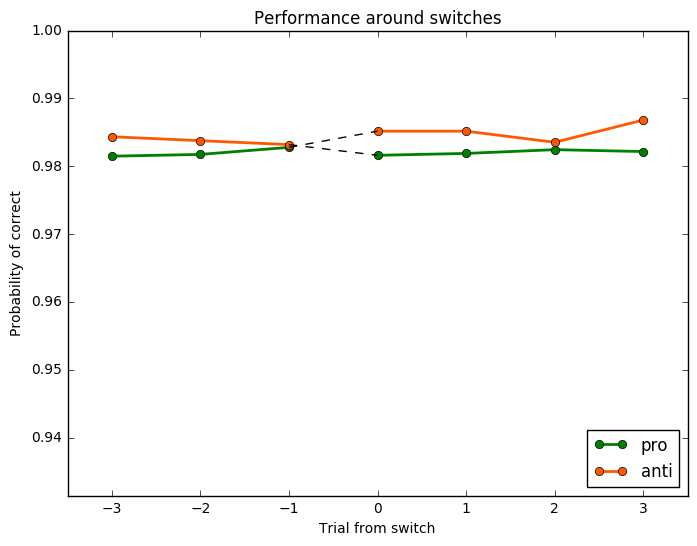

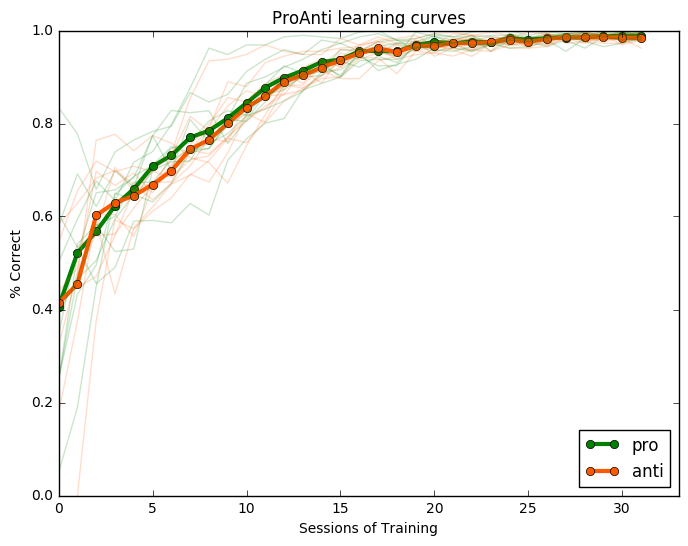

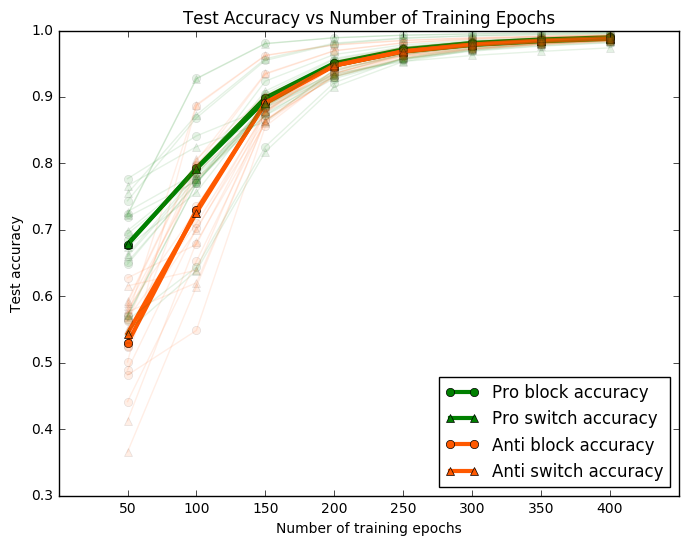

In [8]:
box = simpleBox(mode="alternative",length=1000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
solvers = {}
rats = {}
epoch_per_loop = 50
num_loop = 8
pre_train = 0
for j in range(10):
    ratname = 'VirtualRat'+str(j)
    print ratname
    model = SimplePolicyNetwork(hidden_dim=10,reg=0, noise_factor = 0, temperature=1, recurrent = False)
    rat = SimRat(model)
    box = simpleBox(mode="no_rule",length=10000,block_size=30,random_range=0,
                    trial_per_episode=50, repeat = False, reward_ratio = 1, p2a = 0.5, 
                    block_correction = True, left_right_correction = True)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=epoch_per_loop,
                                        verbose=False,
                                        supervised = True,
                                        stop = False,
                                        print_every=50)
    #solver.load_params(loaded_params)
    solver.init()
    #solver.set_temperature(5.0)

    for i in range(pre_train):
        solver.train()
        probs = rat.predict(val_X,val_y)
        rat.add_prediction_history()
        trial_window = 3
        #draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3, fixed_size= False)
        #draw_3d_new(rat.p2a_left_prob, rat.p2a_right_prob, rat.a2p_left_prob, rat.a2p_right_prob, trial_window = 3)
        #parallel_coordinate(model.activation_history.asnumpy(),rat, start = 0, end = 1000, mode = "normal")
    box.change_mode("alternative")
    for i in range(num_loop - pre_train):
        solver.train()
        probs = rat.predict(val_X,val_y)
        rat.add_prediction_history()
        trial_window = 3
        draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3, fixed_size= False)
        #draw_3d_new(rat.p2a_left_prob, rat.p2a_right_prob, rat.a2p_left_prob, rat.a2p_right_prob, trial_window = 3)
        #parallel_coordinate(model.activation_history.asnumpy(),rat, start = 0, end = 1000, mode = "normal")
    solvers[ratname] = solver
    rats[ratname] = rat
    rat.addHistory(box.output_history())
    rat.computeLearningCurve()
pro_mean, anti_mean = meanLearningCurve(rats)
learningCurve(pro_mean,anti_mean, rats)
accuracy_vs_time(rats, epoch_per_loop, num_loop, exclude = False)

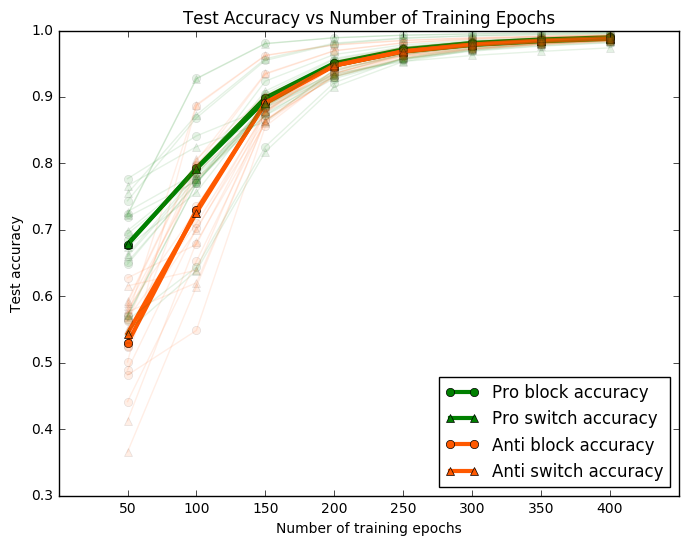

In [9]:
accuracy_vs_time(rats, epoch_per_loop, num_loop, exclude = True)